# Expansion of Saturated Steam

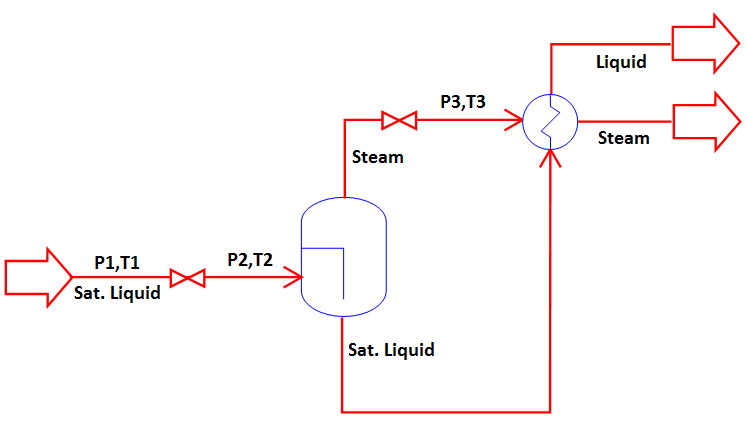

   1) We calculate the flashing of saturated liquid at a given Pressure P1 (bar):

In [4]:
P1 = 25

Now we know that the steam comming out of the flashing is saturated and approximately at a given Temperature T1

In [9]:
T1 = display(round(tsat(P1),2))

223.8

    2) The expansion to a given pressure P2 < P1 can be performed only assuming what type of expansion is going to take place. Normally there are two approaches, Isoentropic and Isoenthalpic. The first is mostly used for the expansions at pressure relief valves, the latter for expansions in other types of valves with high pressure drops i.e. very irreversible. It is quite possible, that real processes are closely described by a mixture of both approaches.

## Isoenthalpic Approach

In [17]:
import math
from scipy.optimize import minimize

'Isobaric Specific Heat kJ/(kgK)'
#T in °C
def cpl(T):
    x = math.exp(T/100)
    cpliq = 0.00018244 * math.pow(x,3) - 0.0037948 * math.pow(x,2) + 0.089990 * x + 3.9858
    return(cpliq)
'Specific Heat of Vaporization (kJ/kg)'
#T in °C
def lam(T):
    x = -0.0069723E-03 * T + 3.6739
    lam = math.pow(1000000 * math.log(-0.0069723 * T + 3.6739) , 1 / 1.8)
    return(lam)
'Saturation Temperature (°C) Pressure in bar-a'
def tsat(P):
    P = P * 760 / 1.01325
    tsat = 1810.94 / (8.14019 - math.log(P , 10)) - 244.485
    return(tsat)
m1 = 1 #kg/h   
Tsat1 = tsat(P1) #°C
P2 = 20 #bara
Tsat2 = tsat(P2) #°C
h2f = cpl((Tsat1 + Tsat2) / 2) * (Tsat2 - Tsat1)
m2v = - h2f / lam(Tsat2) #kg/h
m2l = m1 - m2v
h2g = h2f + lam(Tsat2)
P3 = 10 #bara
Tsat3 = tsat(P3) #°C
h3f = cpl((Tsat1 + Tsat3) / 2) * (Tsat3 - Tsat1)

def Cpg(T):
	Cpg = 0.00000023303 * math.pow(T, 2) + 0.00045214 * T + 1.8423
	return Cpg

def CostFunc(T):
	J = h2f + lam(Tsat2) - (h3f + lam(Tsat3) + (T - Tsat3) * Cpg((Tsat3)))
	return math.fabs(J)
T3 = minimize(CostFunc, Tsat2, method='nelder-mead')
display(round(Tsat2,2))
display(round(m2v,5))
display(round(T3.x[0],2))

212.35

0.02803

189.6